In [1]:
#Import library
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import statsmodels.api as sm
%matplotlib inline 

c:\Python37\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [6]:
#read data file
CompetitorsPrices = pd.read_csv('CASE-STUDY-Posters-master/dataset/Algorithm_CompetitorsPrices_Posters_NL.csv')
Costs = pd.read_csv('CASE-STUDY-Posters-master\dataset/Algorithm_Costs_Posters_NL.csv')
Revenues = pd.read_csv('CASE-STUDY-Posters-master\dataset/Algorithm_Revenues_Posters_NL.csv')
SalesPrice = pd.read_csv('CASE-STUDY-Posters-master\dataset/Algorithm_SalesPrice_Posters_NL.csv')

In [8]:
#Check data info
print(CompetitorsPrices.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sku               3649 non-null   object 
 1   competitor        3649 non-null   object 
 2   competitor_price  3649 non-null   float64
dtypes: float64(1), object(2)
memory usage: 85.6+ KB
None


In [9]:
print(Costs.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3277 entries, 0 to 3276
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   sku                          3277 non-null   object 
 1   salesprice_currency          3277 non-null   object 
 2   supplier_currency            3277 non-null   object 
 3   supplier_price               3277 non-null   float64
 4   Production_days              3277 non-null   int64  
 5   supplier_price_salescountry  3277 non-null   float64
 6   carrier_cost                 3277 non-null   float64
 7   carrier_currency             3277 non-null   object 
 8   carrier_days                 3277 non-null   int64  
 9   extra_days                   3277 non-null   int64  
 10  carrier_cost_salescountry    3277 non-null   float64
 11  @Quantity                    3277 non-null   int64  
 12  @Turnaround                  3277 non-null   object 
 13  @Material         

In [10]:
print(Revenues.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3277 entries, 0 to 3276
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sku       3277 non-null   object 
 1   Revenues  3277 non-null   float64
 2   Orders    3277 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 76.9+ KB
None


In [11]:
print(SalesPrice.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3277 entries, 0 to 3276
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sku          3277 non-null   object 
 1   Sales_Price  3277 non-null   float64
dtypes: float64(1), object(1)
memory usage: 51.3+ KB
None


In [13]:
#Check 'sku' columns are unique
Costs['sku'].is_unique

True

In [14]:
CompetitorsPrices['sku'].is_unique

False

In [15]:
Costs['sku'].is_unique

True

In [16]:
Revenues['sku'].is_unique

True

In [20]:
#Merge Cost and revenue
Costs_Revenues = pd.merge(Costs, Revenues, how = 'left', on= 'sku')
Costs_Revenues.head()

,sku,salesprice_currency,supplier_currency,supplier_price,Production_days,supplier_price_salescountry,carrier_cost,carrier_currency,carrier_days,extra_days,carrier_cost_salescountry,@Quantity,@Turnaround,@Material,@Size,supplier_currency_original,supplier,carrier,Revenues,Orders
0,PO-135G-A2-50-40-4,EUR,EUR,11.5,2,11.5,3.68,EUR,1,1,3.68,50,4 days,135g Gloss,A2,EUR,Verhaag Drukkerij BV,TNT-AVG,29479.26729,999
1,PO-135G-A2-100-40-4,EUR,EUR,20.5,2,20.5,3.68,EUR,1,1,3.68,100,4 days,135g Gloss,A2,EUR,Verhaag Drukkerij BV,TNT-AVG,29136.57392,882
2,PO-135G-A2-50-40-1,EUR,EUR,11.5,0,11.5,3.68,EUR,1,0,3.68,50,1 day,135g Gloss,A2,EUR,Verhaag Drukkerij BV,TNT-AVG,25775.39229,704
3,PO-135G-A2-100-40-1,EUR,EUR,20.5,0,20.5,3.68,EUR,1,0,3.68,100,1 day,135g Gloss,A2,EUR,Verhaag Drukkerij BV,TNT-AVG,19935.51579,365
4,PO-135G-A3-50-40-4,EUR,EUR,3.8,2,3.8,3.68,EUR,1,1,3.68,50,4 days,135g Gloss,A3,EUR,Zalsman B.V.,TNT-AVG,19830.65735,689


In [19]:
print(Costs_Revenues.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3277 entries, 0 to 3276
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   sku                          3277 non-null   object 
 1   salesprice_currency          3277 non-null   object 
 2   supplier_currency            3277 non-null   object 
 3   supplier_price               3277 non-null   float64
 4   Production_days              3277 non-null   int64  
 5   supplier_price_salescountry  3277 non-null   float64
 6   carrier_cost                 3277 non-null   float64
 7   carrier_currency             3277 non-null   object 
 8   carrier_days                 3277 non-null   int64  
 9   extra_days                   3277 non-null   int64  
 10  carrier_cost_salescountry    3277 non-null   float64
 11  @Quantity                    3277 non-null   int64  
 12  @Turnaround                  3277 non-null   object 
 13  @Material         

In [25]:
#Create dataframe Revenues, Orders by Suppliers
Supplier_Revenues= Costs_Revenues.groupby('supplier', as_index= False)[['Revenues', 'Orders']].sum().sort_values(by='Revenues', ascending=False)

In [26]:
Supplier_Revenues.head()

,supplier,Revenues,Orders
12,Verhaag Drukkerij BV,252152.519492,7693
6,Onlineprinters.nl,144820.160017,1790
13,Zalsman B.V.,119504.138302,4194
2,De Groot Drukkerij B.V.,101442.918042,862
7,Probo,67781.095957,1467


In [27]:
Supplier_Revenues.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14 entries, 12 to 4
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   supplier  14 non-null     object 
 1   Revenues  14 non-null     float64
 2   Orders    14 non-null     int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 448.0+ bytes


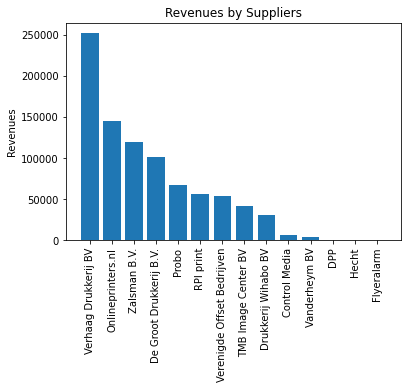

In [28]:
#Graph Revenue by Suppliers
x = Supplier_Revenues['supplier']
y = Supplier_Revenues['Revenues']
plt.bar(x,y)
plt.xticks(rotation = 90)
plt.ylabel('Revenues')
plt.title('Revenues by Suppliers')
plt.show()

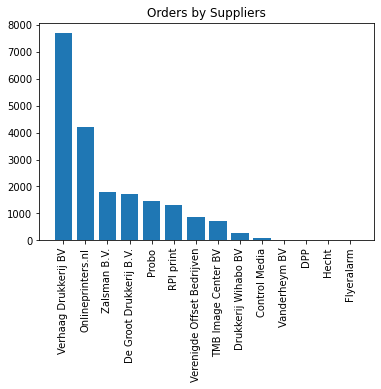

In [29]:
# Graph Orders by Suppliers
x = Supplier_Revenues['supplier']
y = Supplier_Revenues['Orders'].sort_values(ascending=False)
plt.bar(x,y)
plt.xticks(rotation = 90)
plt.title('Orders by Suppliers')
plt.show()

In [30]:
#Add SalesPrice to Costs_Revenues dataframe (Merge)
Costs_Revenues = pd.merge(Costs_Revenues, SalesPrice, how='left', on= 'sku')
Costs_Revenues.head()

,sku,salesprice_currency,supplier_currency,supplier_price,Production_days,supplier_price_salescountry,carrier_cost,carrier_currency,carrier_days,extra_days,...,@Quantity,@Turnaround,@Material,@Size,supplier_currency_original,supplier,carrier,Revenues,Orders,Sales_Price
0,PO-135G-A2-50-40-4,EUR,EUR,11.5,2,11.5,3.68,EUR,1,1,...,50,4 days,135g Gloss,A2,EUR,Verhaag Drukkerij BV,TNT-AVG,29479.26729,999,27.45
1,PO-135G-A2-100-40-4,EUR,EUR,20.5,2,20.5,3.68,EUR,1,1,...,100,4 days,135g Gloss,A2,EUR,Verhaag Drukkerij BV,TNT-AVG,29136.57392,882,28.45
2,PO-135G-A2-50-40-1,EUR,EUR,11.5,0,11.5,3.68,EUR,1,0,...,50,1 day,135g Gloss,A2,EUR,Verhaag Drukkerij BV,TNT-AVG,25775.39229,704,39.95
3,PO-135G-A2-100-40-1,EUR,EUR,20.5,0,20.5,3.68,EUR,1,0,...,100,1 day,135g Gloss,A2,EUR,Verhaag Drukkerij BV,TNT-AVG,19935.51579,365,40.45
4,PO-135G-A3-50-40-4,EUR,EUR,3.8,2,3.8,3.68,EUR,1,1,...,50,4 days,135g Gloss,A3,EUR,Zalsman B.V.,TNT-AVG,19830.65735,689,22.95


In [31]:
Costs_Revenues.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3277 entries, 0 to 3276
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   sku                          3277 non-null   object 
 1   salesprice_currency          3277 non-null   object 
 2   supplier_currency            3277 non-null   object 
 3   supplier_price               3277 non-null   float64
 4   Production_days              3277 non-null   int64  
 5   supplier_price_salescountry  3277 non-null   float64
 6   carrier_cost                 3277 non-null   float64
 7   carrier_currency             3277 non-null   object 
 8   carrier_days                 3277 non-null   int64  
 9   extra_days                   3277 non-null   int64  
 10  carrier_cost_salescountry    3277 non-null   float64
 11  @Quantity                    3277 non-null   int64  
 12  @Turnaround                  3277 non-null   object 
 13  @Material         

In [32]:
#Add SalesPrice to CompetitorsPrices dataframe (Merge)
SalesPrice_CompetitorsPrice = pd.merge(SalesPrice, CompetitorsPrices, on='sku')
SalesPrice_CompetitorsPrice.head()

,sku,Sales_Price,competitor,competitor_price
0,PO-135G-A2-50-40-4,27.45,Competitor1,44.37
1,PO-135G-A2-50-40-4,27.45,Competitor3,40.94
2,PO-135G-A2-50-40-4,27.45,Competitor4,27.86
3,PO-135G-A2-50-40-4,27.45,Competitor5,41.00
4,PO-135G-A2-100-40-4,28.45,Competitor1,47.22


In [33]:
SalesPrice_CompetitorsPrice.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3648 entries, 0 to 3647
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sku               3648 non-null   object 
 1   Sales_Price       3648 non-null   float64
 2   competitor        3648 non-null   object 
 3   competitor_price  3648 non-null   float64
dtypes: float64(2), object(2)
memory usage: 142.5+ KB


In [40]:
#Create dataframe price_pivot grouped by sku
Price_pivot = CompetitorsPrices.pivot_table(index="sku", columns="competitor", values="competitor_price")
Price_pivot.columns.name = None 
Price_pivot = Price_pivot.reset_index()  
print(Price_pivot.head())
print(Price_pivot.info())

                    sku  Competitor1  Competitor2  Competitor3  Competitor4  \
0   PO-100G-A0-100-40-1       149.92       211.93          NaN          NaN   
1   PO-100G-A0-100-40-2       126.75       179.18          NaN          NaN   
2   PO-100G-A0-100-40-4       119.34       168.70          NaN          NaN   
3  PO-100G-A0-1000-40-1       371.33       524.92          NaN          NaN   
4  PO-100G-A0-1000-40-2       324.79       459.12          NaN          NaN   

   Competitor5  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2198 entries, 0 to 2197
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sku          2198 non-null   object 
 1   Competitor1  1077 non-null   float64
 2   Competitor2  332 non-null    float64
 3   Competitor3  1388 non-null   float64
 4   Competitor4  713 non-null    float64
 5   Competitor5  139 n

In [41]:
#Add SalesPrice to Price_pivot (Merge)
Price_pivot =pd.merge(Price_pivot, SalesPrice, on = 'sku')

In [44]:
#Calculate Price Index for competitors

#Price Index for particular sku for particular competitor
Price_pivot['Price_Index_C1'] = Price_pivot['Competitor1']/Price_pivot['Sales_Price']*100
Price_pivot['Price_Index_C2'] = Price_pivot['Competitor2']/Price_pivot['Sales_Price']*100
Price_pivot['Price_Index_C3'] = Price_pivot['Competitor3']/Price_pivot['Sales_Price']*100
Price_pivot['Price_Index_C4'] = Price_pivot['Competitor4']/Price_pivot['Sales_Price']*100
Price_pivot['Price_Index_C5'] = Price_pivot['Competitor5']/Price_pivot['Sales_Price']*100

In [48]:
#Price Index average for particular sku (average all competitors)
Price_pivot['Price_Index_allcompetitors']  = Price_pivot.loc[:, ['Price_Index_C1', 'Price_Index_C2','Price_Index_C3','Price_Index_C4','Price_Index_C5']].mean(axis=1)

In [50]:
#Price Index average for particular competitors (average all sku)
PI_allC1 = Price_pivot['Price_Index_C1'].mean(axis=0)
PI_allC2 = Price_pivot['Price_Index_C2'].mean(axis=0)
PI_allC3 = Price_pivot['Price_Index_C3'].mean(axis=0)
PI_allC4 = Price_pivot['Price_Index_C4'].mean(axis=0)
PI_allC5 = Price_pivot['Price_Index_C5'].mean(axis=0)

#print(Price_pivot.head())
print(Price_pivot.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2197 entries, 0 to 2196
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   sku                         2197 non-null   object 
 1   Competitor1                 1077 non-null   float64
 2   Competitor2                 332 non-null    float64
 3   Competitor3                 1388 non-null   float64
 4   Competitor4                 712 non-null    float64
 5   Competitor5                 139 non-null    float64
 6   Sales_Price                 2197 non-null   float64
 7   Price_Index_C1              1077 non-null   float64
 8   Price_Index_C2              332 non-null    float64
 9   Price_Index_C3              1388 non-null   float64
 10  Price_Index_C4              712 non-null    float64
 11  Price_Index_C5              139 non-null    float64
 12  Price_Index_allcompetitors  2197 non-null   float64
dtypes: float64(12), object(1)
memory 

Text(0.5, 1.0, 'Price_Index_C1')

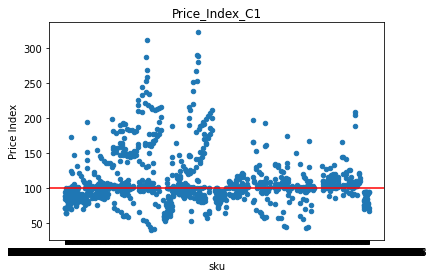

In [55]:
#Graph Price Index for particular sku for competitor 1 (Price_Index_C1)
Price_pivot.plot("sku", 'Price_Index_C1', kind='scatter')
plt.axhline(y = 100, color = 'r', linestyle = '-')
#plt.xticks(rotation = 90)
plt.ylabel('Price Index')
plt.title('Price_Index_C1')

Text(0.5, 1.0, 'Price_Index_C2')

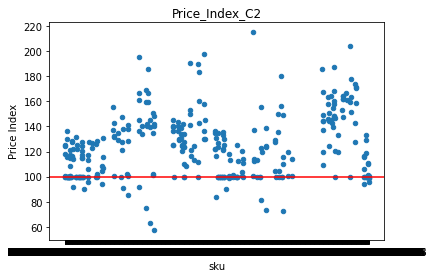

In [62]:
# Graph Price Index for particular sku for competitor 2 (Price_Index_C2)
Price_pivot.plot("sku", "Price_Index_C2", kind="scatter")
plt.axhline(y=100, color='r', linestyle='-')
plt.ylabel("Price Index")
plt.title("Price_Index_C2")

Text(0.5, 1.0, 'Price_Index_C3')

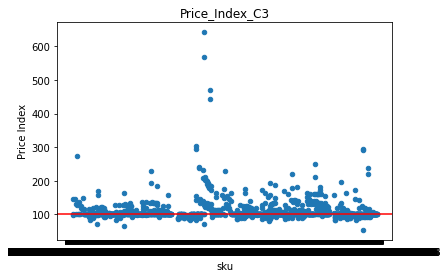

In [63]:
# Graph Price Index for particular sku for competitor 3 (Price_Index_C3)
Price_pivot.plot("sku", "Price_Index_C3", kind="scatter")
plt.axhline(y=100, color='r', linestyle='-')
plt.ylabel("Price Index")
plt.title("Price_Index_C3")

Text(0.5, 1.0, 'Price_Index_C4')

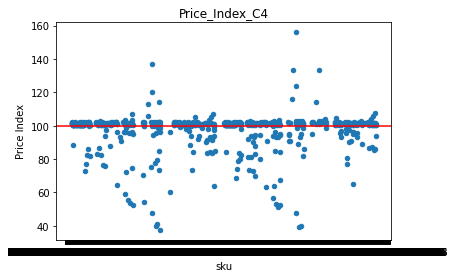

In [64]:
# Graph Price Index for particular sku for competitor 4 (Price_Index_C4)
Price_pivot.plot("sku", "Price_Index_C4", kind="scatter")
plt.axhline(y=100, color='r', linestyle='-')
plt.ylabel("Price Index")
plt.title("Price_Index_C4")

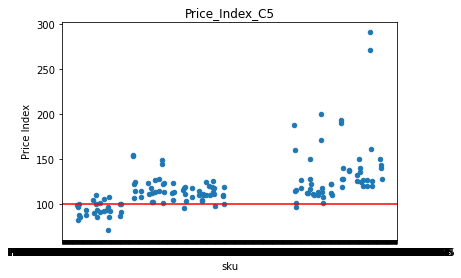

In [98]:
# Graph Price Index for particular sku for competitor 5 (Price_Index_C5)
Price_pivot.plot("sku", "Price_Index_C5", kind="scatter")
plt.axhline(y=100, color='r', linestyle='-')
plt.ylabel("Price Index")
plt.title("Price_Index_C5")
plt.show()

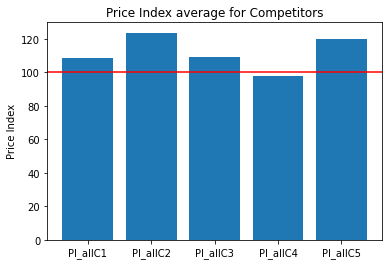

In [74]:
#Graph Price Index average for Competitors
objects = ('PI_allC1', 'PI_allC2', 'PI_allC3', 'PI_allC4', 'PI_allC5')
y_pos = np.arange(len(objects))
PI = np.array([PI_allC1, PI_allC2, PI_allC3, PI_allC4, PI_allC5])
plt.axhline(y = 100, color = 'r', linestyle= '-')
plt.bar(y_pos, PI, align='center', alpha = 1)
plt.xticks(y_pos, objects)
plt.ylabel('Price Index')
plt.title('Price Index average for Competitors')
plt.show()

In [75]:
#Add revenues, Order to Price_pivot dataframe (Merge)
Price_pivot = pd.merge(Price_pivot, Revenues, on='sku')

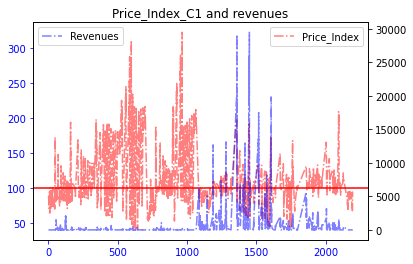

In [85]:
# Graph Price_Index_C1 and our revenues for each sku
df_C1 = Price_pivot[Price_pivot["Price_Index_C1"].notna()]
fig, ax = plt.subplots()
plt.plot(df_C1["Price_Index_C1"], '-.r', label='Price_Index', alpha= 0.5)
plt.axhline(y=100, color='r', linestyle='-')
plt.legend(loc=1)
ax.tick_params( colors='r')
plt.title("Price_Index_C1 and revenues")

#get second axis
ax2 = ax.twinx()
plt.plot(df_C1['Revenues'], '-.b', label = 'Revenues', alpha = 0.5 )
plt.legend(loc=2)
ax.tick_params(colors ='b')

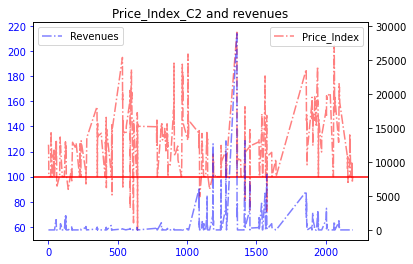

In [87]:
# Graph Price_Index_C2 and our revenues for each sku
df_C2 = Price_pivot[Price_pivot["Price_Index_C2"].notna()]
fig, ax = plt.subplots()
plt.plot(df_C2["Price_Index_C2"], '-.r', label='Price_Index', alpha= 0.5)
plt.axhline(y=100, color='r', linestyle='-')
plt.legend(loc=1)
ax.tick_params( colors='r')
plt.title("Price_Index_C2 and revenues")
# Get second axis
ax2 = ax.twinx()
plt.plot(df_C2["Revenues"], '-.b', label="Revenues", alpha= 0.5)
plt.legend(loc=2)
ax.tick_params(colors='b')

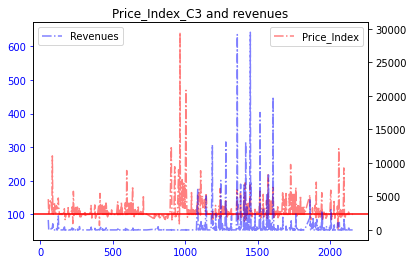

In [88]:
# Graph Price_Index_C3 and our revenues for each sku
df_C3 = Price_pivot[Price_pivot["Price_Index_C3"].notna()]
fig, ax = plt.subplots()
plt.plot(df_C3["Price_Index_C3"], '-.r', label='Price_Index', alpha= 0.5)
plt.axhline(y=100, color='r', linestyle='-')
plt.legend(loc=1)
ax.tick_params( colors='r')
plt.title("Price_Index_C3 and revenues")
# Get second axis
ax2 = ax.twinx()
plt.plot(df_C3["Revenues"], '-.b', label="Revenues", alpha= 0.5)
plt.legend(loc=2)
ax.tick_params( colors='b')

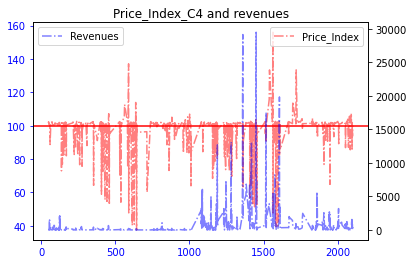

In [89]:
# Graph Price_Index_C4 and our revenues for each sku
df_C4 = Price_pivot[Price_pivot["Price_Index_C4"].notna()]
fig, ax = plt.subplots()
plt.plot(df_C4["Price_Index_C4"], '-.r', label='Price_Index', alpha= 0.5)
plt.axhline(y=100, color='r', linestyle='-')
plt.legend(loc=1)
ax.tick_params( colors='r')
plt.title("Price_Index_C4 and revenues")
# Get second axis
ax2 = ax.twinx()
plt.plot(df_C4["Revenues"], '-.b', label="Revenues", alpha= 0.5)
plt.legend(loc=2)
ax.tick_params( colors='b')

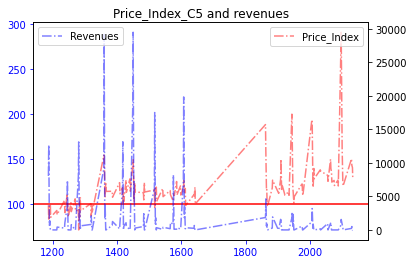

In [90]:
# Graph Price_Index_C5 and our revenues for each sku
df_C5 = Price_pivot[Price_pivot["Price_Index_C5"].notna()]
fig, ax = plt.subplots()
plt.plot(df_C5["Price_Index_C5"], '-.r', label='Price_Index', alpha= 0.5)
plt.axhline(y=100, color='r', linestyle='-')
plt.legend(loc=1)
ax.tick_params( colors='r')
plt.title("Price_Index_C5 and revenues")
# Get second axis
ax2 = ax.twinx()
plt.plot(df_C5["Revenues"], '-.b', label="Revenues", alpha= 0.5)
plt.legend(loc=2)
ax.tick_params( colors='b')

In [91]:
#Calculate Total_Cost, Markup, Profit
Costs_Revenues['Total_Cost'] = Costs_Revenues['supplier_price_salescountry']+Costs_Revenues['carrier_cost_salescountry']
Costs_Revenues['Markup'] = Costs_Revenues['Sales_Price'] - Costs_Revenues['Total_Cost']
Costs_Revenues['Profit'] = Costs_Revenues['Markup']*Costs_Revenues['Orders']

In [92]:
#Add sku,  Competitor1, Competitor2, Competitor3, Competitor4, Competitor5, Price_Index_allcompetitors to Costs_Revenues df (Merge)
Costs_Revenues = pd.merge(Costs_Revenues, Price_pivot.loc[:, ["sku","Competitor1","Competitor2","Competitor3","Competitor4","Competitor5","Price_Index_allcompetitors"]], how='left', on='sku')
Costs_Revenues.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3277 entries, 0 to 3276
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   sku                          3277 non-null   object 
 1   salesprice_currency          3277 non-null   object 
 2   supplier_currency            3277 non-null   object 
 3   supplier_price               3277 non-null   float64
 4   Production_days              3277 non-null   int64  
 5   supplier_price_salescountry  3277 non-null   float64
 6   carrier_cost                 3277 non-null   float64
 7   carrier_currency             3277 non-null   object 
 8   carrier_days                 3277 non-null   int64  
 9   extra_days                   3277 non-null   int64  
 10  carrier_cost_salescountry    3277 non-null   float64
 11  @Quantity                    3277 non-null   int64  
 12  @Turnaround                  3277 non-null   object 
 13  @Material         

In [95]:
#Calculate Min_CompetitorPrice, CostAdvantage
Costs_Revenues['Min_CompetitorPrice']=Costs_Revenues.loc[:, ["Competitor1","Competitor2","Competitor3","Competitor4","Competitor5"]].min(axis=1)
Costs_Revenues['CostAdvantage'] = (Costs_Revenues['Total_Cost'] - Costs_Revenues['Min_CompetitorPrice'])*100/Costs_Revenues['Min_CompetitorPrice']
Costs_Revenues.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3277 entries, 0 to 3276
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   sku                          3277 non-null   object 
 1   salesprice_currency          3277 non-null   object 
 2   supplier_currency            3277 non-null   object 
 3   supplier_price               3277 non-null   float64
 4   Production_days              3277 non-null   int64  
 5   supplier_price_salescountry  3277 non-null   float64
 6   carrier_cost                 3277 non-null   float64
 7   carrier_currency             3277 non-null   object 
 8   carrier_days                 3277 non-null   int64  
 9   extra_days                   3277 non-null   int64  
 10  carrier_cost_salescountry    3277 non-null   float64
 11  @Quantity                    3277 non-null   int64  
 12  @Turnaround                  3277 non-null   object 
 13  @Material         

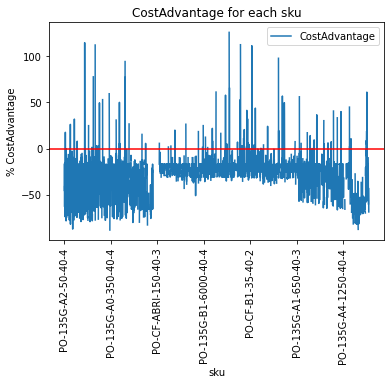

In [97]:
#Graph CostAdvantage for each sku
Costs_Revenues.plot('sku', 'CostAdvantage', kind= 'line')
plt.ylabel('% CostAdvantage')
plt.title('CostAdvantage for each sku')
plt.axhline(y = 0,color='r', linestyle='-')
plt.xticks(rotation = 90)
plt.show()